In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [106]:
df = pd.read_csv('../data/banks_data_1984.csv')
NetImcome_df = pd.read_csv('../data/USNIM.csv')

In [67]:
df.columns

Index(['DATE', 'US100NUM', 'US13NUM', 'US31NUM', 'US115NUM', 'USG15NUM',
       'US100NIM', 'US13NIM', 'US31NIM', 'US115NIM', 'USG15NIM', 'US100ROA',
       'US13ROA', 'US31ROA', 'US115ROA', 'USG15ROA', 'US100ROE', 'US13ROE',
       'US31ROE', 'US115ROE', 'USG15ROE', 'US100LLRTL', 'US13LLRTL',
       'US31LLRTL', 'US115LLRTL', 'USG15LLRTL', 'US100NPTL', 'US13NPTL',
       'US31NPTL', 'US115NPTL', 'USG15NPTL'],
      dtype='object')

In [113]:
#For now, we choose not to consider super big banks with assets greater than $15B
df['TinyBanksNum'] = df.US100NUM /(df.US100NUM+df.US13NUM+df.US31NUM+df.US115NUM+df.USG15NUM)
df['SmallBanksNum'] = df.US13NUM / (df.US100NUM+df.US13NUM+df.US31NUM+df.US115NUM+df.USG15NUM)
df['MidBanksNum'] = df.US31NUM / (df.US100NUM+df.US13NUM+df.US31NUM+df.US115NUM+df.USG15NUM)
df['LargeBanksNum'] = df.US115NUM /(df.US100NUM+df.US13NUM+df.US31NUM+df.US115NUM+df.USG15NUM)
df['BanksNum'] = df.US100NUM+df.US13NUM+df.US31NUM+df.US115NUM+df.USG15NUM

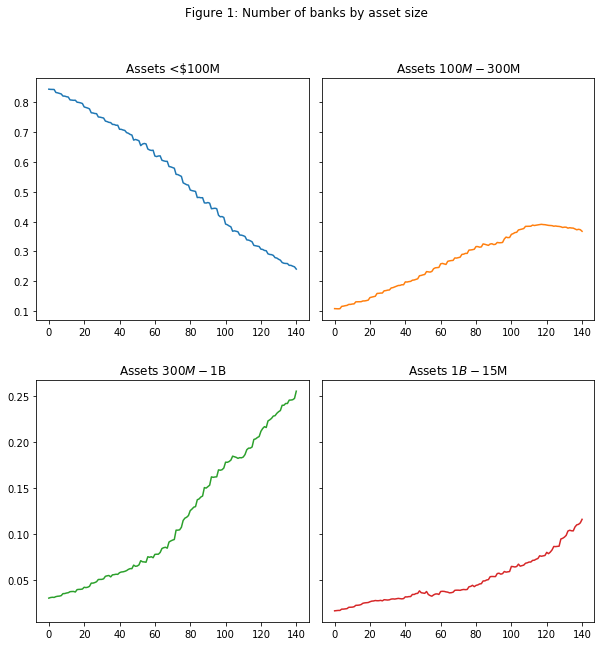

In [104]:
#TODO: fix y-axis into DateTime
fig, axs = plt.subplots(2, 2, figsize = (10,10), sharey='row',gridspec_kw={'hspace': 0.25, 'wspace': 0.05})
fig.suptitle('Figure 1: Number of banks by asset size')
axs[0, 0].plot(df.TinyBanksNum)
axs[0, 0].set_title('Assets <$100M')

axs[0, 1].plot(df.SmallBanksNum, 'tab:orange')
axs[0, 1].set_title('Assets $100M-$300M')
axs[1, 0].plot(df.MidBanksNum, 'tab:green')
axs[1, 0].set_title('Assets $300M-$1B')
axs[1, 1].plot(df.LargeBanksNum, 'tab:red')
axs[1, 1].set_title('Assets $1B-$15M')
plt.show()

In [155]:
#TODO: move this step to data set prep file
df = df.merge(NetImcome_df, how = 'left')
df.tail(8)


,DATE,US100NUM,US13NUM,US31NUM,US115NUM,USG15NUM,US100NIM,US13NIM,US31NIM,US115NIM,...,US13NPTL,US31NPTL,US115NPTL,USG15NPTL,TinyBanksNum,SmallBanksNum,MidBanksNum,LargeBanksNum,BanksNum,USNIM
133,2017-04-01,1298,1891,1197,519,77,3.78,3.83,3.81,3.77,...,1.03,0.92,0.87,1.29,0.260538,0.379566,0.240265,0.104175,4982,3.12
134,2017-07-01,1284,1871,1197,512,78,3.82,3.88,3.85,3.77,...,1.02,0.89,0.85,1.25,0.259814,0.378592,0.242210,0.103602,4942,3.15
135,2017-10-01,1269,1849,1184,506,81,3.84,3.90,3.85,3.81,...,0.94,0.82,0.83,1.26,0.259562,0.378196,0.242176,0.103498,4889,3.17
136,2018-01-01,1230,1821,1193,523,85,3.85,3.89,3.86,3.87,...,1.00,0.84,0.83,1.18,0.253504,0.375309,0.245878,0.107791,4852,3.23
137,2018-04-01,1218,1791,1182,529,86,3.88,3.93,3.91,3.89,...,0.98,0.80,0.80,1.08,0.253433,0.372659,0.245943,0.110071,4806,3.30
138,2018-07-01,1190,1776,1169,525,86,3.91,3.97,3.94,3.91,...,0.95,0.80,0.79,1.02,0.250737,0.374210,0.246313,0.110619,4746,3.33
139,2018-10-01,1165,1748,1161,526,87,3.94,3.99,3.98,3.92,...,0.89,0.76,0.77,0.99,0.248560,0.372946,0.247706,0.112225,4687,3.35
140,2019-01-01,1121,1710,1189,540,92,3.91,3.95,3.92,3.90,...,0.98,0.78,0.76,0.99,0.240972,0.367584,0.255589,0.116079,4652,3.36


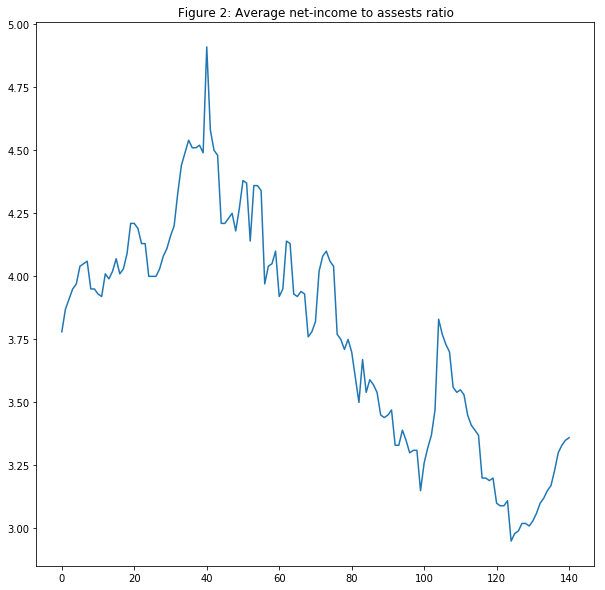

In [131]:
plt.figure(figsize = (10, 10))
plt.title ('Figure 2: Average net-income to assests ratio')
plt.plot(df.USNIM)
plt.show()

In [119]:
#Step 1: Consider regression NUM = b_0+b_1 * (NI)
mod = sm.OLS(df.BanksNum, df.USNIM)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               BanksNum   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     2222.
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           8.81e-88
Time:                        10:58:02   Log-Likelihood:                -1290.6
No. Observations:                 141   AIC:                             2583.
Df Residuals:                     140   BIC:                             2586.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
USNIM       2392.5292     50.759     47.135      0.0

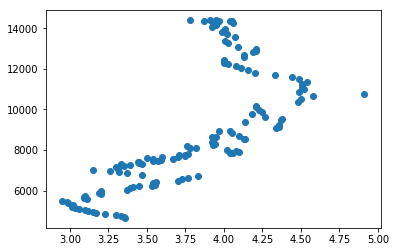

In [163]:
plt.scatter(df.USNIM, df.BanksNum)

In [158]:
#Step 2: Run model for the first 8 qaurters - start of the period 
y_start = df.BanksNum.iloc[0:8]
x_start = df.USNIM.iloc[0:8]
mod = sm.OLS(y_start, x_start)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               BanksNum   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.104e+04
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           1.86e-12
Time:                        11:24:10   Log-Likelihood:                -58.476
No. Observations:                   8   AIC:                             119.0
Df Residuals:                       7   BIC:                             119.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
USNIM       3631.3315     34.560    105.072      0.0

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


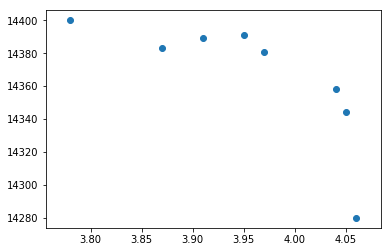

In [162]:
plt.scatter(x_start, y_start)

In [157]:
#Step 3: Run model for last 8 qaurters - end of the period
y_end = df.BanksNum.iloc[133:141]
x_end = df.USNIM.iloc[133:141]
mod = sm.OLS(y_end, x_end)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               BanksNum   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2756.
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           2.38e-10
Time:                        11:24:08   Log-Likelihood:                -55.284
No. Observations:                   8   AIC:                             112.6
Df Residuals:                       7   BIC:                             112.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
USNIM       1480.3004     28.196     52.500      0.0

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


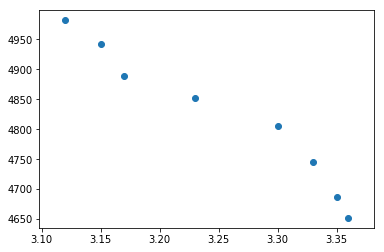

In [164]:
plt.scatter(x_end, y_end )